In [1]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd

### load results
- for each 

In [2]:
# find the most recent

In [3]:
from pathlib2 import Path
from tfumap.paths import MODEL_DIR

In [1]:
dataset = 'cifar10'

saved_networks = list((MODEL_DIR / 'semisupervised' / dataset).glob('*'))
location_df = pd.DataFrame(columns=['dataset', 'labels_per_class', 'projection_dims', 'umap_prop', 'timestamp', 'location'])
for i in saved_networks:
    if len(i.name.split('_')) != 14:
        print(i)
        continue
    ds, umap_prop, projection_dims, labels_per_class, _, _, _, y, m, d,h,m,s,f = i.name.split('_')
    timestamp = datetime.strptime('_'.join(i.name.split('_')[-7:]), "%Y_%m_%d_%H_%M_%S_%f")
    location_df.loc[len(location_df)] = [ds, labels_per_class, projection_dims, umap_prop, timestamp, i]
location_df  

NameError: name 'MODEL_DIR' is not defined

#### grab the relavent results

In [5]:
dataset = 'cifar10'

label_sizes = [1, 4, 16, 64, 256, 1024]
projection_dims = 1024
umap_prop_list = [0.0, 1.0]

In [6]:
results_df = pd.DataFrame(columns = ['labels_per_class', 'accuracy', 'umap_prop', 'timestamp'])
for nex in label_sizes:
    for umap_prop in umap_prop_list:
        subset_df = location_df[
            (location_df.dataset == dataset) & 
            (location_df.labels_per_class == str(nex)) & 
            (location_df.projection_dims == str(projection_dims)) & 
            (location_df.umap_prop == str(umap_prop) ) 
        ]
        
        for idx, row in subset_df.sort_values(by='timestamp', ascending=False).iterrows():
            acc_list = list(row.location.glob('test_acc.npy'))
            if len(acc_list)> 0:
                acc = np.load(acc_list[0])
                acc = np.mean(acc)
                results_df.loc[len(results_df)] = [nex, acc, umap_prop, row.timestamp]
                break
            

In [7]:
results_df

,labels_per_class,accuracy,umap_prop,timestamp
0,1,0.1838,0.0,2020-07-31 23:11:45.033351
1,1,0.1000,1.0,2020-07-31 17:47:37.793107
2,4,0.1774,0.0,2020-07-31 17:42:46.440651
3,4,0.1755,1.0,2020-07-31 23:27:13.012171
4,16,0.2919,0.0,2020-07-31 17:42:43.175915
5,16,0.2474,1.0,2020-07-31 23:27:52.575100
6,64,0.3174,0.0,2020-07-31 17:11:05.811717
7,64,0.3158,1.0,2020-07-31 23:31:00.587082
8,256,0.3926,0.0,2020-07-31 17:13:18.940447
9,256,0.4360,1.0,2020-08-01 08:45:34.067655


In [8]:
import seaborn as sns

In [9]:
 results_df[results_df.umap_prop == '0.0']

/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,labels_per_class,accuracy,umap_prop,timestamp


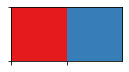

In [10]:
pal = sns.color_palette('Set1',2)
sns.palplot(pal)

In [14]:
from tfumap.paths import DATA_DIR, FIGURE_DIR, ensure_dir, save_fig

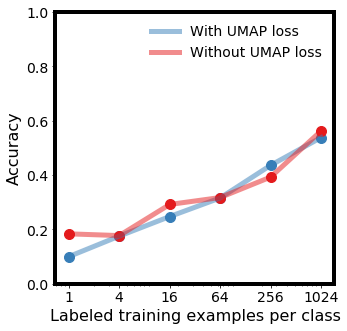

In [15]:
fig, ax = plt.subplots(figsize=(5,5))


color = pal[1]
nex = results_df[results_df.umap_prop == 1.0].labels_per_class.values.astype('int')
acc = results_df[results_df.umap_prop == 1.0].accuracy.values
ax.scatter(nex, acc, color=color, s=100)
ax.plot(nex, acc, linewidth = 5, alpha = 0.5, color=color, label = 'With UMAP loss')

color = pal[0]
nex = results_df[results_df.umap_prop == 0.0].labels_per_class.values.astype('int')
acc = results_df[results_df.umap_prop == 0.0].accuracy.values
ax.scatter(nex, acc, color=color, s=100)
ax.plot(nex, acc, linewidth = 5, alpha = 0.5, color=color, label = 'Without UMAP loss')

ax.set_xscale('log')
ax.set_ylim([0,1])
ax.set_xticks(nex)
ax.set_xticklabels([str(i) for i in nex]);
ax.set_ylabel('Accuracy', fontsize=16)
ax.set_xlabel('Labeled training examples per class', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
[i.set_linewidth(4) for i in ax.spines.values()];
leg = ax.legend(fontsize=14)
leg.get_frame().set_linewidth(0.0)
save_fig(FIGURE_DIR/'cifar10_semisupervised', save_pdf=True)

In [12]:
### plot results 